Batches:   0%|          | 0/217 [00:00<?, ?it/s]

(6940, 384)
(6940, 2)


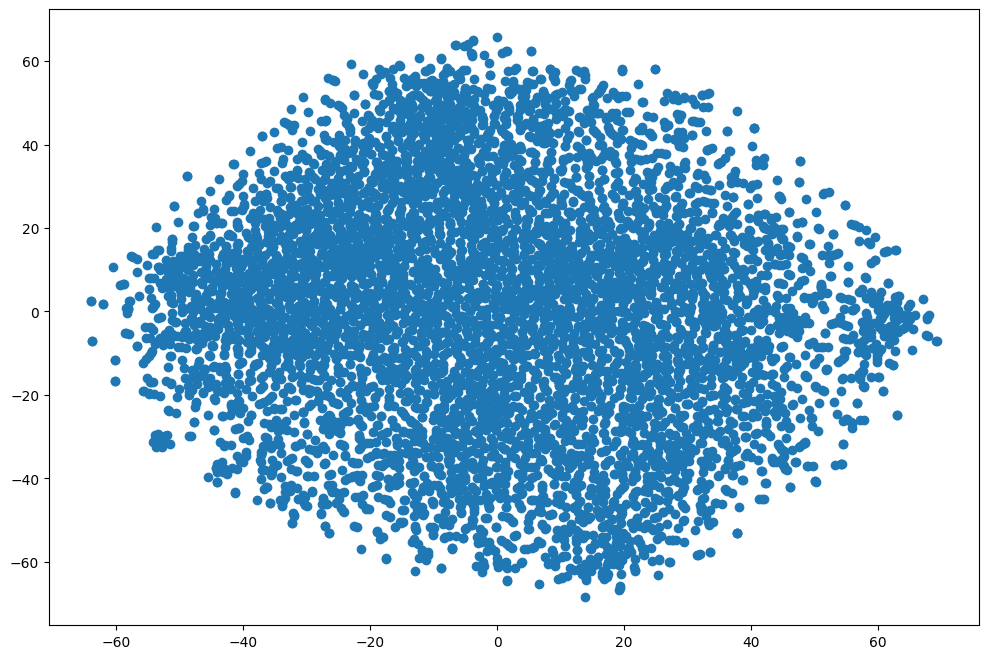

In [13]:
# Import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer
import json
import re


df = pd.read_csv('./dataset.csv')
train_test_split = int(0.8 * len(df))
train_posts = list(df["posts"][:train_test_split])
test_posts = list(df["posts"][train_test_split:])

# Step 1: Generate Embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(train_posts, show_progress_bar=True)
embeddings = np.array(embeddings)
print(embeddings.shape)

# Step 2: Reduce Dimensionality with t-SNE
tsne = TSNE(n_components=2)
embeddings_reduced = tsne.fit_transform(embeddings)
print(embeddings_reduced.shape)

# Step 3: Plotting
x_coords = embeddings_reduced[:, 0]
y_coords = embeddings_reduced[:, 1]
plt.figure(figsize=(12, 8))
plt.scatter(x_coords, y_coords)

### Elbow Plot

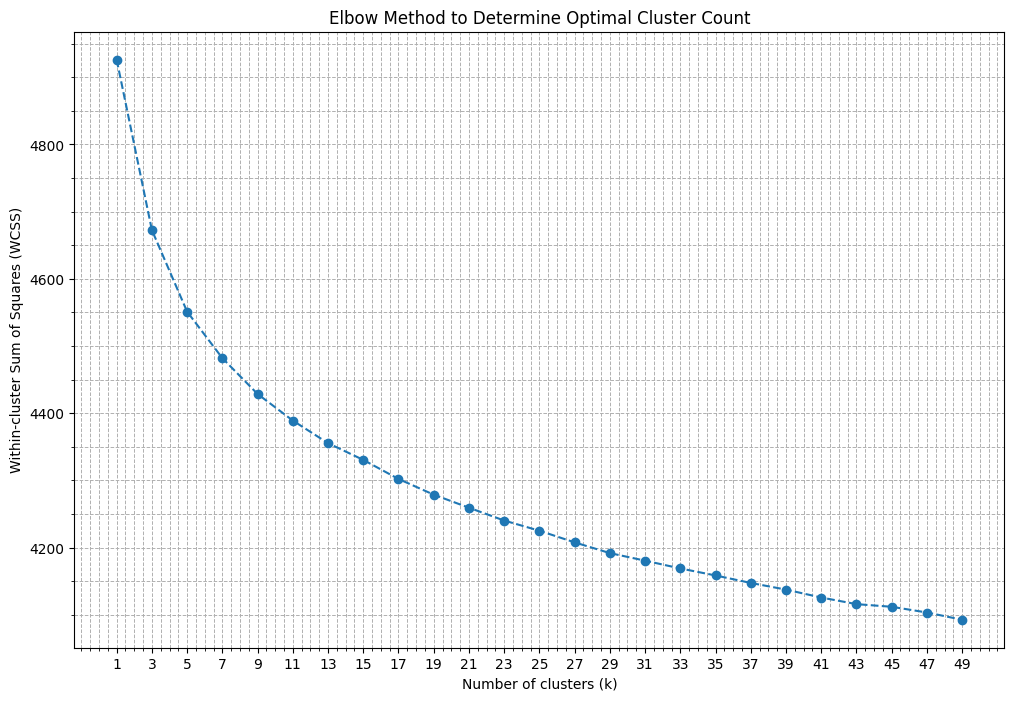

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize the list to hold the within-cluster sum of square values
wcss = []

# We might want to test a range of k values; I'll choose from 1 to 15
k_clusters = range(1, 50, 2)
for i in k_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(embeddings)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS for that model
    if i % 10 == 0:
        print(f'Finished {i} clusters')

# Now time to craft our plot with elbow grease
plt.figure(figsize=(12, 8))
plt.plot(k_clusters, wcss, marker='o', linestyle='--')

# Let's make it look top-notch, follow the material design principles for crisp visuals
plt.title('Elbow Method to Determine Optimal Cluster Count')
plt.xlabel('Number of clusters (k)')
plt.xticks(k_clusters)
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.minorticks_on()
plt.savefig(f"images/clustering_elbow.png")
plt.show()

/tmp/ipykernel_1601/2944051983.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  palette = plt.cm.get_cmap('turbo', k_optimal)  # 'tab10' provides nice distinct colors


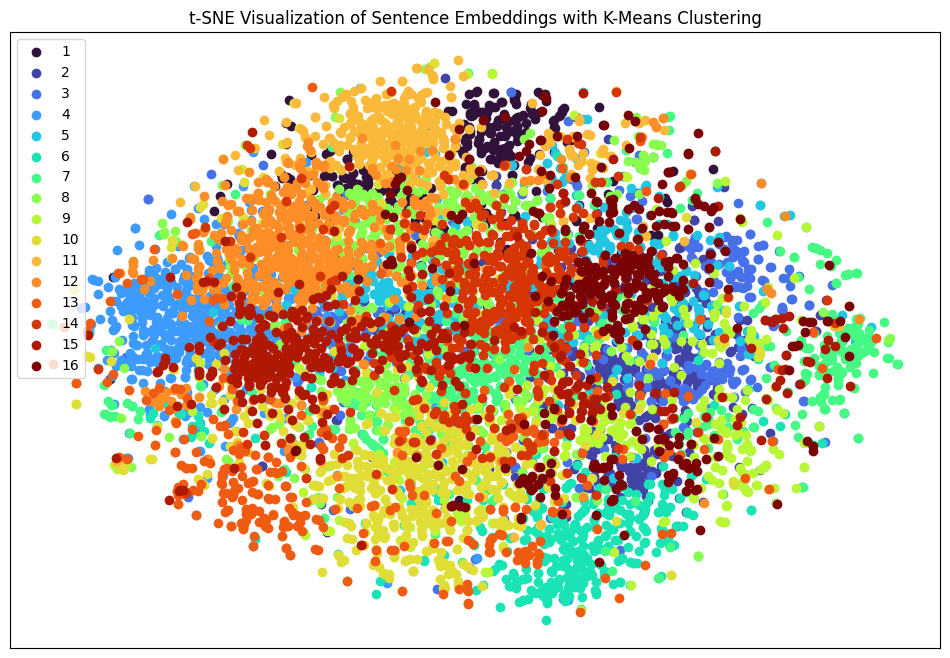

In [15]:
# Let's assume k_optimal is the optimal cluster count we selected from the elbow plot
k_optimal = 16  # Replace this with the actual optimal number of clusters you have observed
labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16"]

# Now run the K-Means algorithm with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=1000, n_init=16, random_state=0)
cluster_labels = kmeans_optimal.fit_predict(embeddings)

# Then we visualize using a palette that has a nice variety of distinct colors
palette = plt.cm.get_cmap('turbo', k_optimal)  # 'tab10' provides nice distinct colors
plt.figure(figsize=(12, 8))

# Scatter plot with color coding for each cluster
for i in range(k_optimal):
    plt.scatter(x_coords[cluster_labels == i], y_coords[cluster_labels == i], label=labels[i], c=[palette(i)], alpha=1)

# Shining the spotlight on good design
plt.title('t-SNE Visualization of Sentence Embeddings with K-Means Clustering')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 

# Add that crisp legend, positioned so it doesn’t smudge our plot
plt.legend()

# And display!
plt.savefig(f"images/16_clusters.png")
plt.show()

### TESTING

In [20]:
test_embeddings = model.encode(test_posts, show_progress_bar=True)

Batches:   0%|          | 0/55 [00:00<?, ?it/s]

In [21]:
test_cluster_labels = kmeans_optimal.fit_predict(test_embeddings)
test_cluster_labels

array([ 1,  1, 15, ..., 12,  1,  4], dtype=int32)

In [24]:
df[train_test_split:]

,type,posts
6940,INFP,So true! I said earlier that my face was very...
6941,INTJ,"Congrats, Spades. You are just TOO awesome. An..."
6942,ENTP,@BrokenGenius Here is an alternate perspectiv...
6943,INTP,"Yeah, I realize that now.|||The Trio Mugen -..."
6944,INFJ,"Oh, hehe. Thanks, buddy. (That's just me wanti..."
...,...,...
8670,ISFP,https://www.youtube.com/watch?v=t8edHB_h908|||...
8671,ENFP,So...if this thread already exists someplace e...
8672,INTP,So many questions when i do these things. I w...
8673,INFP,I am very conflicted right now when it comes t...
